<a href="https://colab.research.google.com/github/dequiroz/1MTR53_RobIA/blob/main/NewtonRaphson_2DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1FsTa2YzWwxY-HBkd2EOXAlkPJ1zpikWv" alt="drawing" width="150"/>


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1VBn7nKlruxCPLHH_UuD8B2pkvKP7JLRd" alt="drawing" width="800"/>


</br>

<img src="https://drive.google.com/uc?export=view&id=1tpg1CJh4or-VMrY-Qip25hgedgwy1Y8-" alt="drawing" width="800"/>
</p>


#Newton-Raphson para Cinemática Inversa en robots manipuladores
* Diego Quiroz Velasquez
* Pontificia Universidad Católica del Perú
* Sección Ingeniería Mecatrónica


---
Este archivo describe ...

<img src="https://drive.google.com/uc?export=view&id=1vgFoFHEKMN0WcAFlKS2hPMg2KuBm3sp9" alt="drawing"/>



In [1]:
# @title Historial de versiones
"""
Historial de versiones:
v1.0 - 2025-03-01 - Version Inicial (Rodrigo Carabajal)
v1.1 - 2025-04-27 - Dar formato del curso (Diego Quiroz)
                    Limpiar y reordenar código.
"""

'\nHistorial de versiones:\nv1.0 - 2025-03-01 - Version Inicial (Rodrigo Carabajal)\nv1.1 - 2025-04-27 - Dar formato del curso (Diego Quiroz)\n                    Limpiar y reordenar código.\n'

2 GDL CON MÉTODO NEWTON - RAPHSON

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# =============================================================================
# Se define la función para calcular la cinemática directa del manipulador de
# 2 grados de libertad RR
# =============================================================================
def cinematica_directa_2DOF(q, L):
    '''
    Aplica cinemática directa para calcular la posición del efector final para
    un robot manipulador de 2 grados de libertad, dado los ángulos de articulación

    Parámetros:
       q (np.array): ángulo de giro de cada articulación en radianes [q1, q2]
       L (np.array): dimensiones de los eslabones [l1, l2]

    Retorna:
       np.array: Coordenadas [x, y] de la posición del efector final
    '''

    x = L[0] * np.cos(q[0]) + L[1] * np.cos(q[0] + q[1])
    y = L[0] * np.sin(q[0]) + L[1] * np.sin(q[0] + q[1])

    return np.array([x, y])

In [4]:
# =============================================================================
# Se define la función para calcular el jacobiano del manipulador de 2 grados
# de libertad RR
# =============================================================================
def jacobiano_2DOF(q, L):
  '''
  Calcula el jacobiano del brazo planar de 2GDL

  Parámetros:
      q (np.array): ángulo de giro de cada articulación en radianes [q1, q2]
      L (np.array): dimensiones de los eslabones [l1, l2]

  Retorna:
      Una matriz 2x2 que representa el Jacobiano del robot.
  '''
  l1 = L[0]
  l2 = L[1]
  q1 = q[0]
  q2 = q[1]
  J = np.array([[-l1 * np.sin(q1) - l2 * np.sin(q1 + q2), -l2 * np.sin(q1 + q2)],
                [l1 * np.cos(q1) + l2 * np.cos(q1 + q2), l2 * np.cos(q1 + q2)]])
  return J

In [5]:
def constraints(q):
    """Ajusta los ángulos para que estén en el rango [-pi, pi]"""
    return np.mod(q + np.pi, 2 * np.pi) - np.pi

In [13]:
# =============================================================================
# Función de Cinemática Inversa para un manipulador de 2 grados de libertad RR
# Emplea el método de Newton-Raphson
# =============================================================================
def IK_NR_2DOF(x_deseado, q_inicial, L, max_iteraciones=100, epsilon=1e-6):
  '''
  Resuelve la Cinemática Inversa usando Newton-Raphson con restricciones en los
  ángulos para un robot planar de 2GDL
  '''
  q = np.array(q_inicial)

  for i in range(max_iteraciones):
    x_actual = cinematica_directa_2DOF(q, L)

    if np.linalg.norm(x_deseado - x_actual) < epsilon:  # Convergencia
            print("Solución encontrada en", i, "iteraciones")
            return q  # Devuelve los ángulos y el número de iteraciones

    J = jacobiano_2DOF(q, L)
    J_inv = np.linalg.inv(J)  # Inversa del jacobiano
    q += J_inv @ (x_deseado - x_actual)  # Actualización de Newton-Raphson

    # Aplicar restricciones de ángulo (-pi a pi)
    q = constraints(q)

  print("No convergió en", max_iteraciones, "iteraciones")
  return q

In [14]:
L = [1, 1]  # Longitudes de los eslabones (para un robot 2DOF)
q_0 = [10, 10]  # Estimación inicial
goal = np.array([0.5, 0.5])  # Posición deseada

q_0 = np.array([np.deg2rad(q_0[0]), np.deg2rad(q_0[1])])
q_solution = IK_NR_2DOF(goal, q_0, L)

posicion_alcanzada = cinematica_directa_2DOF(q_solution, L)
print(f"La posicion alcanzada fue: {posicion_alcanzada}")
print(f"q1 = {np.rad2deg(q_solution[0])}°")
print(f"q2 = {np.rad2deg(q_solution[1]):.2f}°")

Solución encontrada en 7 iteraciones
La posicion alcanzada fue: [0.5        0.49999999]
q1 = -24.295190089921817°
q2 = 138.59°


GRAFICAR LA SOLUCIÓN

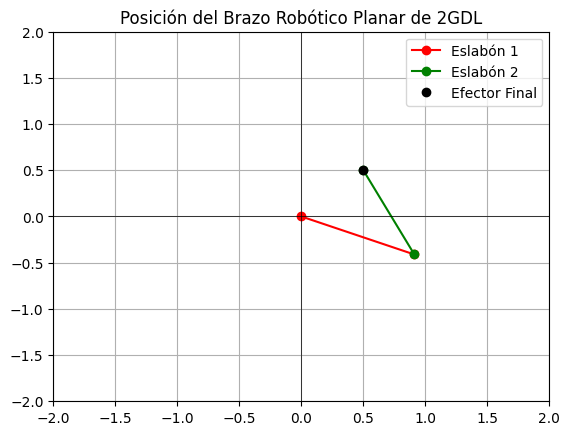

In [ ]:
# Función para visualizar el robot 2DOF
def plot_robot_2DOF(q, L):
    """Visualiza el brazo robótico de 2DOF en 2D"""
    # Calculamos las posiciones de los eslabones con los ángulos
    x0, y0 = 0, 0  # Origen (base del brazo)
    x1 = L[0] * np.cos(q[0])
    y1 = L[0] * np.sin(q[0])
    x2 = x1 + L[1] * np.cos(q[0] + q[1])
    y2 = y1 + L[1] * np.sin(q[0] + q[1])

    # Dibujar el brazo robótico
    plt.figure()
    plt.plot([x0, x1], [y0, y1], 'ro-', label='Eslabón 1')  # graficar el eslabón 1
    plt.plot([x1, x2], [y1, y2], 'go-', label='Eslabón 2')  # graficar el eslabón 2
    plt.plot(x2, y2, 'ko', label='Efector Final')  # Efector final
    plt.xlim(-np.sum(L), np.sum(L))
    plt.ylim(-np.sum(L), np.sum(L))
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.title('Posición del Brazo Robótico Planar de 2GDL')
    plt.show()

# Visualizar el brazo con la solución obtenida
plot_robot_2DOF(q_solution, L)